In [1]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
import scipy.stats as st

In [2]:
#importing/read csv
spotify_data = pd.read_csv('./bw_resources/top10s.csv', encoding='ISO-8859-1')

spotify_data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [4]:
spotify_data.count()

Unnamed: 0    603
title         603
artist        603
top genre     603
year          603
bpm           603
nrgy          603
dnce          603
dB            603
live          603
val           603
dur           603
acous         603
spch          603
pop           603
dtype: int64

In [5]:
print(spotify_data.columns)

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


In [7]:
#drop unnamed index 
spotify_data=spotify_data.drop(columns=['Unnamed: 0'])

In [8]:
spotify_data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [9]:
#drop columns that are not needed 
spotify_data=spotify_data.drop(columns=['nrgy', 'dnce','dB','live','val'])
spotify_data=spotify_data.drop(columns=['dur','acous','spch','pop'])

In [10]:
spotify_data.head()

,title,artist,top genre,year,bpm
0,"Hey, Soul Sister",Train,neo mellow,2010,97
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87
2,TiK ToK,Kesha,dance pop,2010,120
3,Bad Romance,Lady Gaga,dance pop,2010,119
4,Just the Way You Are,Bruno Mars,pop,2010,109


In [11]:
spotify_data.count()

title        603
artist       603
top genre    603
year         603
bpm          603
dtype: int64

In [12]:
#rename columns for aesthetic purposes 
spotify_data.rename(columns= {'title': 'Song Title', 'artist': 'Artist', 'top genre':'Genre', 'year':'Year'}, inplace=True)

spotify_data.columns

Index(['Song Title', 'Artist', 'Genre', 'Year', 'bpm'], dtype='object')

In [13]:
spotify_data.head()

,Song Title,Artist,Genre,Year,bpm
0,"Hey, Soul Sister",Train,neo mellow,2010,97
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87
2,TiK ToK,Kesha,dance pop,2010,120
3,Bad Romance,Lady Gaga,dance pop,2010,119
4,Just the Way You Are,Bruno Mars,pop,2010,109


In [14]:
#explore genre data
spotify_data['Genre'].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

In [15]:
spotify_data['Genre'].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
hip pop                        6
australian dance               6
complextro                     6
australian pop                 5
atl hip hop                    5
edm                            5
permanent wave                 4
hip hop                        4
latin                          4
tropical house                 3
colombian pop                  3
folk-pop                       2
acoustic pop                   2
downtempo                      2
indie pop                      2
canadian hip hop               2
baroque pop                    2
brostep                        2
electronic trap                2
candy pop 

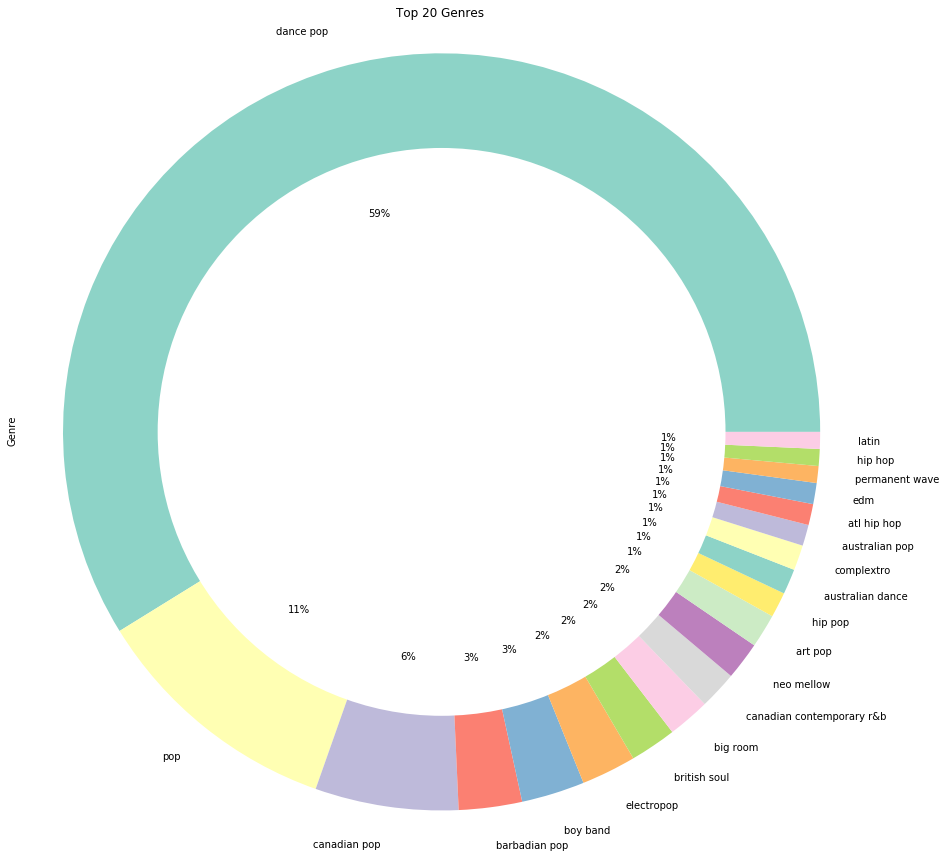

In [42]:
#pie chart to visualize the top 20 genres 
color_palette = sns.color_palette('Set3')
plt.title("Top 20 Genres")

spotify_data["Genre"].value_counts().head(20).plot.pie(figsize=(15,15), colors=color_palette, autopct='%1.0f%%')

#donut pie chart
center_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.title("Top 20 Genres")

#save figure
plt.savefig("./bw_output/bw_top20_pie")

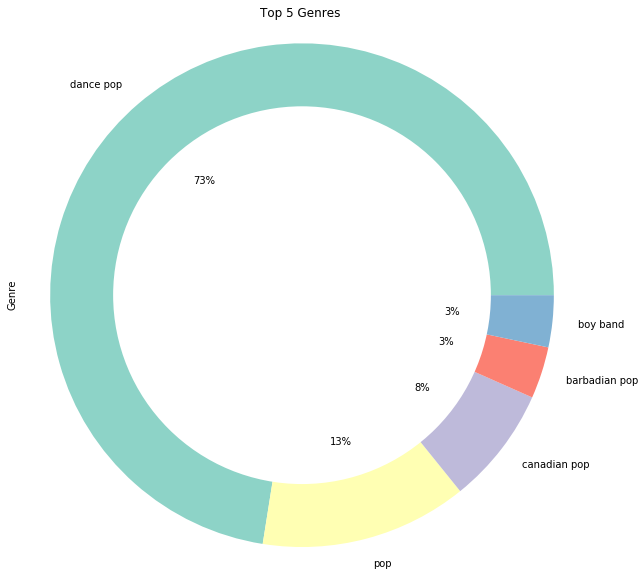

In [26]:
#pie chart to visualize the top 5 genres 
color_palette = sns.color_palette('Set3')

spotify_data["Genre"].value_counts().head(5).plot.pie(figsize=(10,10), colors=color_palette, autopct='%1.0f%%')


#donut pie chart
center_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.title("Top 5 Genres")

#save figure
plt.savefig("./bw_output/bw_top5_pie")

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


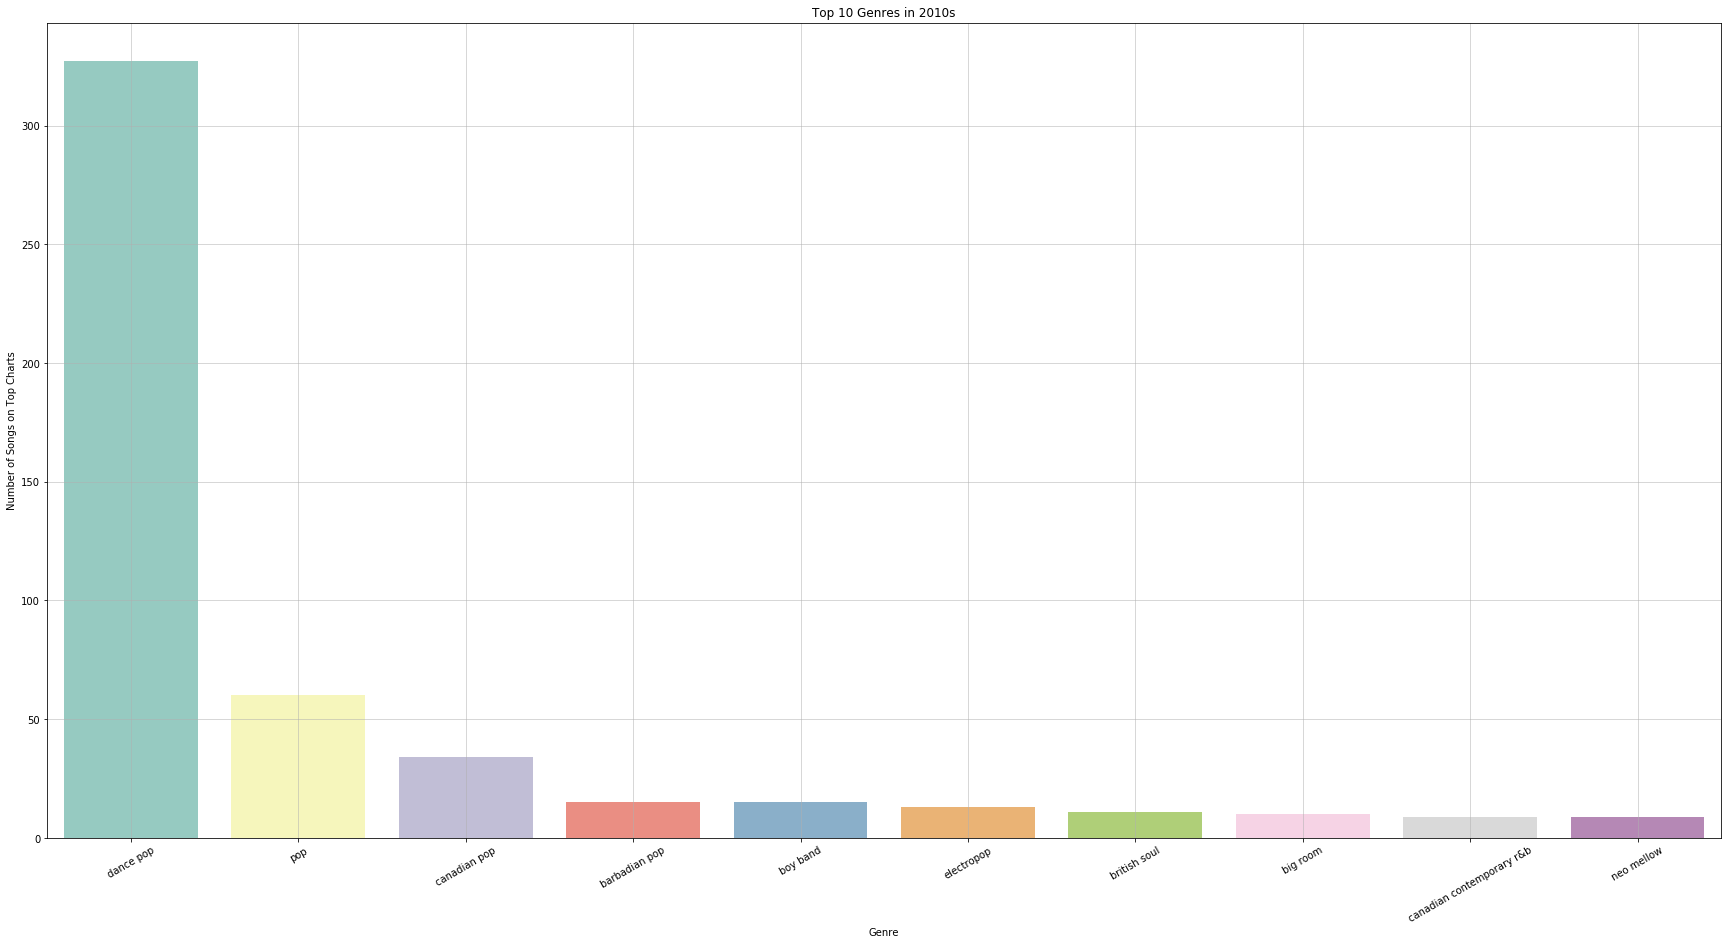

In [36]:
#bar chart to visualize the top 10 genres
top_genres = spotify_data["Genre"].value_counts().head(10)
x_axis = top_genres.index
y_axis = top_genres.values

#bar chart specifics
plt.figure(figsize=(30,15))
sns.barplot(x_axis, y_axis, palette='Set3')
plt.title("Top 10 Genres in 2010s")
plt.xlabel("Genre")
plt.ylabel("Number of Songs on Top Charts")
plt.xticks(rotation = 30)
plt.grid(linestyle='-', linewidth=0.5)

#save figure
plt.savefig("./bw_output/bw_top10_bar")

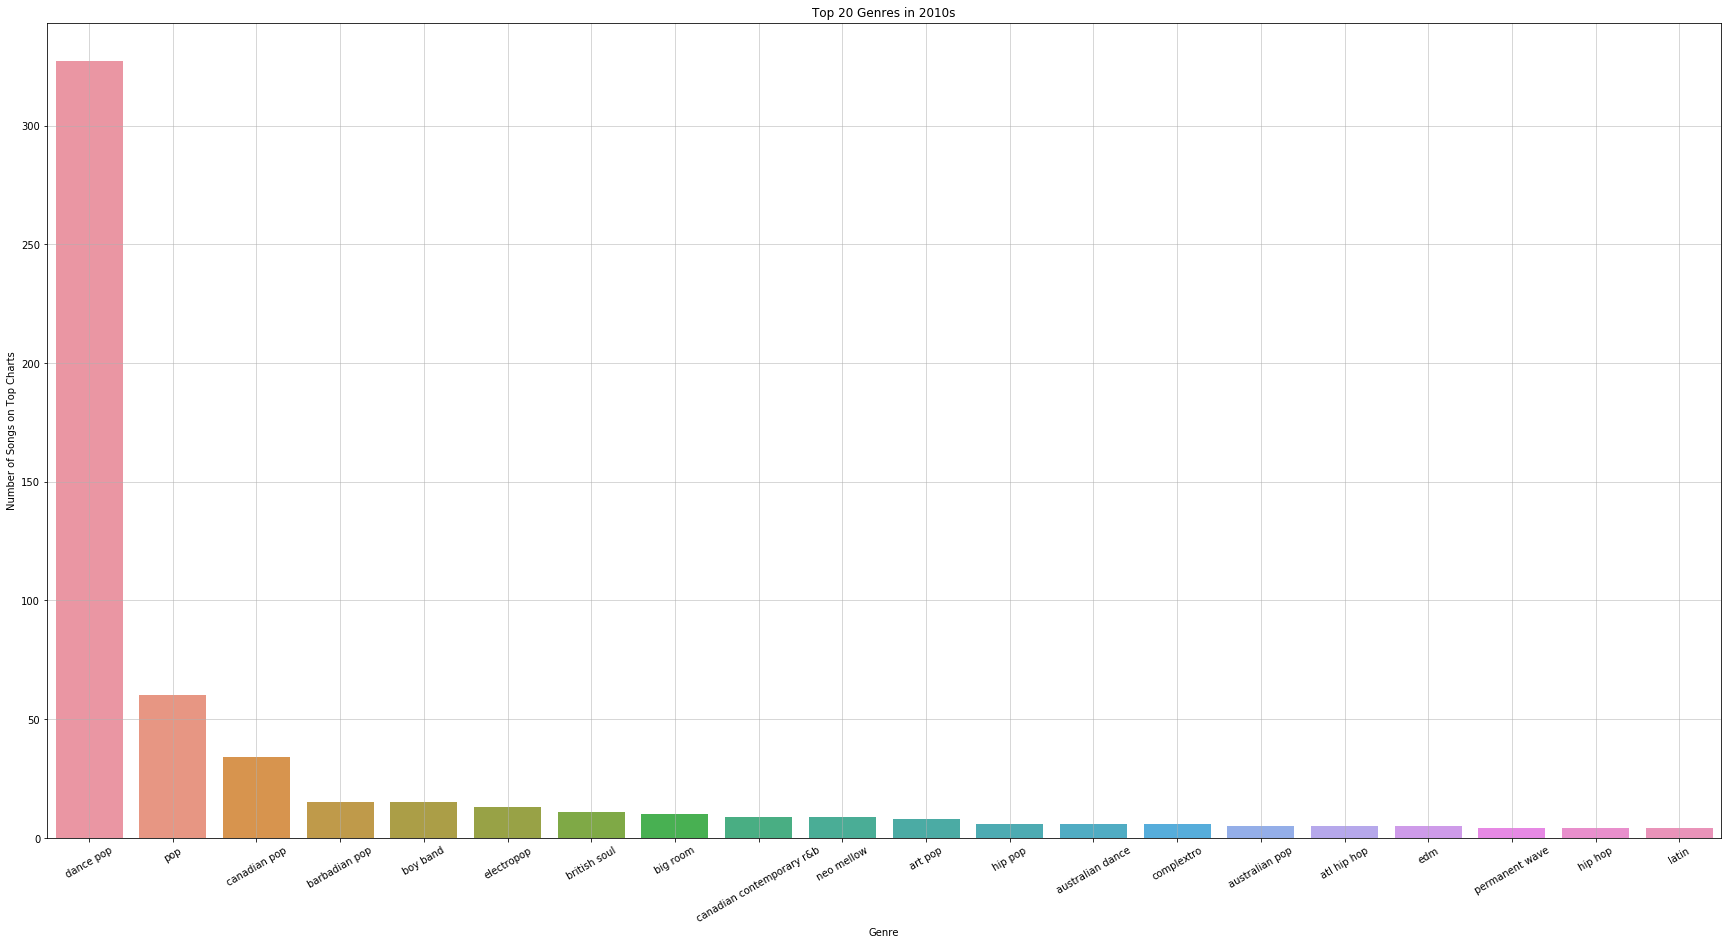

In [30]:
#bar chart to visualize the top 20 genres
top_genres = spotify_data["Genre"].value_counts().head(20)
x_axis = top_genres.index
y_axis = top_genres.values

#bar chart specifics
plt.figure(figsize=(30,15))
sns.barplot(x_axis, y_axis)
plt.title("Top 20 Genres in 2010s")
plt.xlabel("Genre")
plt.ylabel("Number of Songs on Top Charts")
plt.xticks(rotation = 30)
plt.grid(linestyle='-', linewidth=0.5)

#save figure
plt.savefig("./bw_output/bw_top20_bar")

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packa

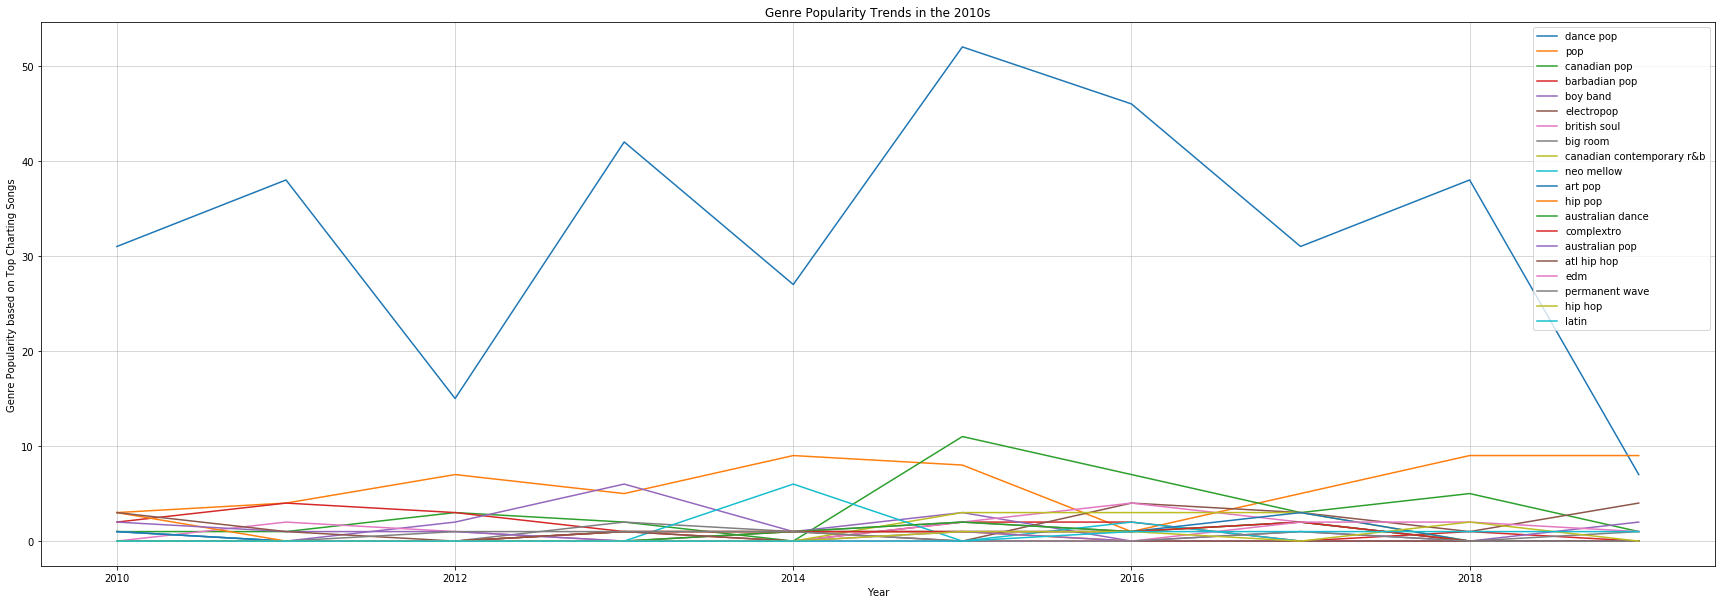

In [19]:
#line chart to visualize the genre trends over the 2010s decade 

#loop through genre data from 2010 to 2020 
plt.figure(figsize=(30,10))

for i in top_genres.index :
    trends = []
    for y in range(2010,2020):
        song_genre = spotify_data[spotify_data['Year']== y][spotify_data['Genre'] ==i]
        trends.append(song_genre.shape[0])
    sns.lineplot(x=list(range(2010,2020)), y=trends)

plt.title("Genre Popularity Trends in the 2010s")
plt.xlabel("Year")
plt.ylabel("Genre Popularity based on Top Charting Songs")
plt.grid(linestyle='-', linewidth=0.5)
plt.legend(list(top_genres.index))

#save figure
plt.savefig("./bw_output/bw_topgenres_line")

## Analysis 
* Most popular genre was Dance Pop, with Pop routinely in second place
* Canadian Pop overtook Pop in 2015 
* Dance Pop had a sharp decline in popularity in 2019, where Pop took the lead
* The popularity of genres did not see much of an evolution, or drastic change - as most genres are under the Pop umbrella anyways. 